In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# SkLearn implementation

In [2]:
data =load_iris()

data.__class__

sklearn.utils._bunch.Bunch

In [3]:
X = data.data
Y = data.target
Classes = ["Setosa", "Versicolour", "Virginica"]

In [4]:
print(len(X))
print(len(Y))

150
150


In [5]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state=11, test_size=0.25)

In [6]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)

KNeighborsClassifier()

<Axes: >

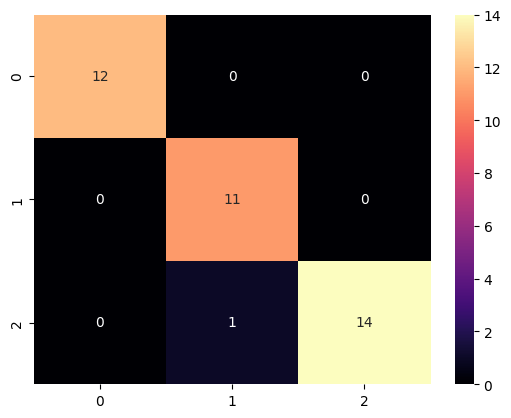

In [7]:
predictions = model.predict(X_test)
cm = confusion_matrix(Y_test, predictions )
sns.heatmap(cm, cmap="magma", annot=True)

# My Implementation

In [9]:
import math 

In [10]:
# Making my own model

def get_Euclidean_distance(r1, r2):
    distance = 0
    for i in range(0,len(r1)):
        distance += (r1[i] - r2[i])**2 
    return math.sqrt(distance)


def get_neighbors(targetPoint, X_train, n):
    """
    This functions returns the list of testPoints 
    that are closest to targetPoints
    """
    distances = []
    for row in X_train:
        distance = get_Euclidean_distance(row, targetPoint)
        distances.append((row, distance))
    distances.sort(key = lambda x:x[1])
    
    NearestNeighbors = []    
    for i in range(0,n):
        NearestNeighbors.append(distances[i][0])
    return NearestNeighbors

def get_Class(targetPoint, X_train, Y_train, n):
    X_train = X_train.tolist()
    Y_train = Y_train.tolist()

    classes = ["Setosa", "Versicolour", "Virginica"]
    
    classCount = {
        "Setosa" : 0,
        "Versicolour": 0, 
        "Virginica" : 0
    }
    
    NearestNeighbors = get_neighbors(targetPoint, X_train, n)
    

    for flower in NearestNeighbors:

        ClassNum = Y_train[X_train.index(flower)]
        ClassName = classes[ClassNum]
        classCount[ClassName] += 1

    for key in classCount:
        if classCount[key] == max(classCount.values()):
            return key 

def makePredictions(X_train, Y_train, INPUTS, K = 5):
    OUTPUTS = []
    for targetPoint in INPUTS:
        classification = get_Class(targetPoint, X_train, Y_train, K)
        OUTPUTS.append(classification)
    return OUTPUTS


In [31]:
ModelPredictions = model.predict(X_test)
HomeCookedModelPredictions = makePredictions(X_train, Y_train, X_test, K = 7) 

In [32]:
ModelPredictions_Classes = []
classes = ["Setosa", "Versicolour", "Virginica"]
for item in ModelPredictions:
    ModelPredictions_Classes.append(classes[item])

Y_classes = []
for item in Y_test:
    Y_classes.append(classes[item])


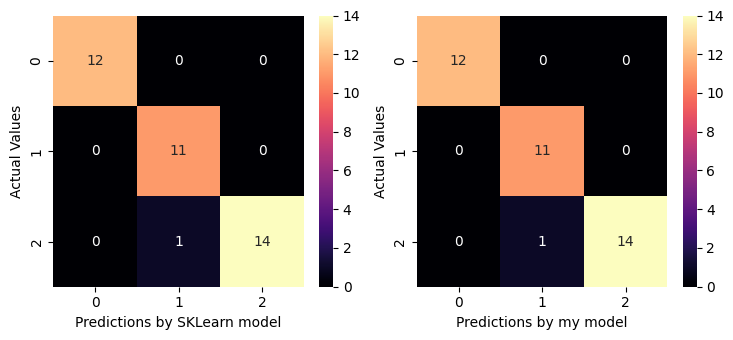

In [55]:
SkLearnResults= confusion_matrix(Y_classes, ModelPredictions_Classes)
ImplementationResults = confusion_matrix(Y_classes, HomeCookedModelPredictions)

fig, (ax1, ax2) = plt.subplots(1,2)
SkHeatmap = sns.heatmap(SkLearnResults, cmap = "magma", annot=True, ax = ax1)
KNNHeatmap = sns.heatmap(ImplementationResults, cmap = "magma", annot=True, ax = ax2)

SkHeatmap.set_ylabel('Actual Values')
SkHeatmap.set_xlabel('Predictions by SKLearn model')
KNNHeatmap.set_xlabel('Predictions by my model')
KNNHeatmap.set_ylabel('Actual Values')
plt.show()

